In [20]:
import numpy as np
import math as m
from matplotlib import pyplot as plt



T = 2.0
vol = 0.32
mu = 0.12
P0 = 100
r = 0.06
interval = 1/250
C0 = 100
alpha0 = 0
S0 = 100
sim = 80000

def CPPI(F, M):
    B0 = C0
    P0 = C0
    alpha_init = alpha0
    
    alpha = np.ones(sim) * alpha_init
    S = S0 * np.ones(sim) 
    B = B0 * np.ones(sim) 
    P = P0 * np.ones(sim)
    i = 1
    
    while i <= (T/interval):
        nalpha = alpha
        S = S * np.exp((mu - vol ** 2 / 2) * interval + vol * m.sqrt(interval) * np.random.normal(0,1,sim))
        alpha = M * (np.maximum(0, B * m.exp(r * interval) + alpha * S - F) / S)
        B = B * m.exp(r * interval) - S * (alpha - nalpha)
        P = nalpha * S + B
        i = i + 1
    R = np.log(P/P0)
    R = np.sort(R)
    mean = np.mean(R)
    sd = np.std(R)
    VAR = np.quantile(R, 0.05)
    cVAR = np.mean(R[R<=VAR])
    return mean, sd, VAR, cVAR, R
    
    


from tabulate import tabulate

sim1 = CPPI(0,1)
sim2 = CPPI(0,0.5)
sim3 = CPPI(0,2)
sim4 = CPPI(85,2)
sim5 = CPPI(85,4)

table = [['(F,M)', 'Mean', 'Standard Deviation', '95% VaR', '95% cVaR'],
 ['(0,1)', sim1[0], sim1[1], sim1[2], sim1[3]],
 ['(0,0.5)', sim2[0], sim2[1], sim2[2], sim2[3]],
 ['(0,2)', sim3[0], sim3[1], sim3[2], sim3[3]],
 ['(85,2)',sim4[0], sim4[1], sim4[2], sim4[3]],
 ['(85,4)',sim5[0], sim5[1], sim5[2], sim5[3]]]

print(tabulate(table))

-------  --------------------  ------------------  --------------------  --------------------
(F,M)    Mean                  Standard Deviation  95% VaR               95% cVaR
(0,1)    0.13747360843535725   0.4522935806810767  -0.6123729692950489   -0.7967530903131189
(0,0.5)  0.1547092667652293    0.2255905386249709  -0.21662432401550422  -0.3107107317400144
(0,2)    -0.04896320937622236  0.9043907110872561  -1.541167802207647    -1.9206252817328855
(85,2)   0.14923099555981326   0.203976190733214   -0.06739370206816264  -0.08540886128102589
(85,4)   0.11734745481628651   0.3717473338037802  -0.1337653039189789   -0.1409706907506748
-------  --------------------  ------------------  --------------------  --------------------


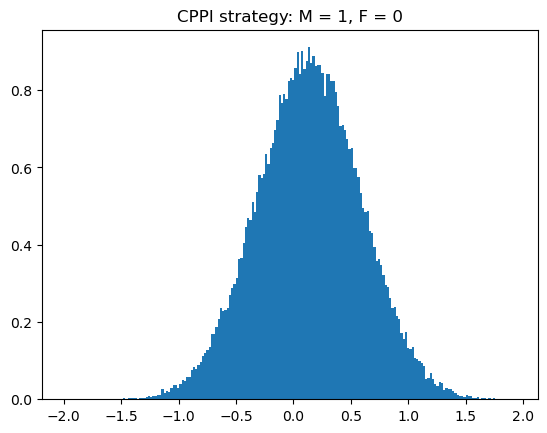

In [21]:
plt.hist(sim1[4], bins = 200, density = True)
plt.title("CPPI strategy: M = 1, F = 0")
plt.show()
# plot 1

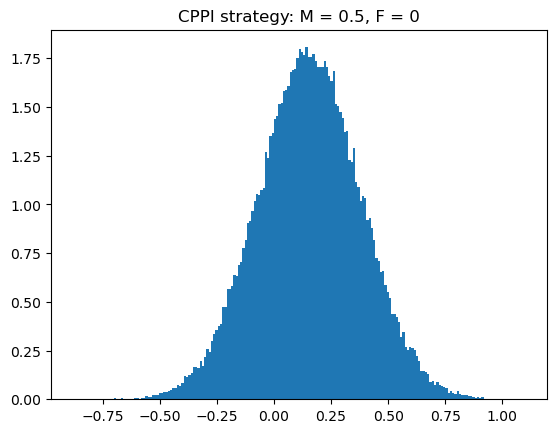

In [22]:
plt.hist(sim2[4], bins = 200, density = True)
plt.title("CPPI strategy: M = 0.5, F = 0")
plt.show()
# plot 2

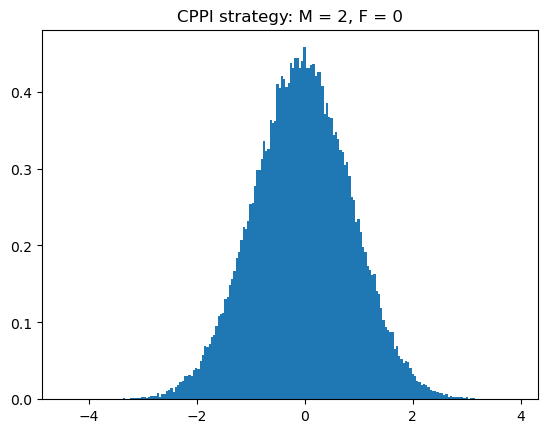

In [23]:
plt.hist(sim3[4], bins = 200, density = True)
plt.title("CPPI strategy: M = 2, F = 0")
plt.show()
# plot 3

We see that the above plots are presenting a shape of normal distribution, as the mean value equals zero. And we also see the range of x gets larger as the variance becomes larger.

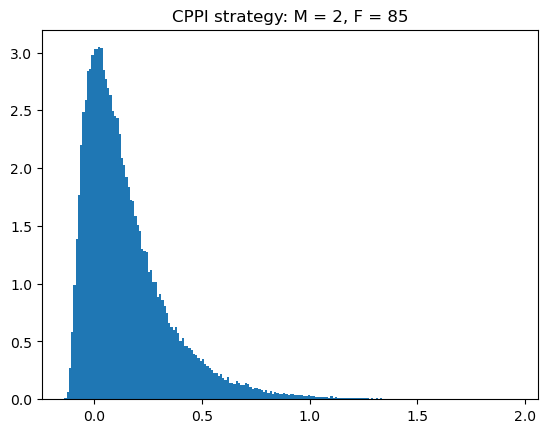

In [26]:
plt.hist(sim4[4], bins = 200, density = True)
plt.title("CPPI strategy: M = 2, F = 85")
plt.show()
# plot 4

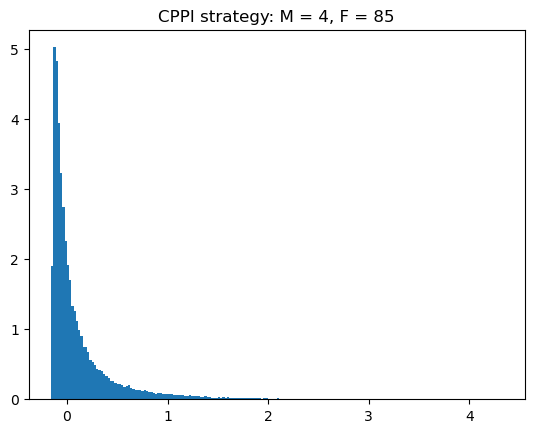

In [25]:
plt.hist(sim5[4], bins = 200, density = True)
plt.title("CPPI strategy: M = 4, F = 85")
plt.show()
# plot 5

We can note that the above two plots are presenting a shape of lognormal distribution. And we can see the tail gets longer as the variance gets larger.  